# Churn Model Training

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
df_copy = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Data Cleaning and Preporcessing

In [3]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Drop the columns that are not needed for the model
- columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']

In [6]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

- CreditScore: The credit score of the customer
- Geography: The country from which the customer
- Age: The age of the customer
- Tenure: The number of years for which the customer has been with the bank
- Balance: The bank balance of the customer
- NumOfProducts: The number of bank products the customer is utilising
- HasCrCard: Binary Flag for whether the customer holds a credit card with the bank or not
- IsActiveMember: Binary Flag for whether the customer is an active member with the bank or not
- EstimatedSalary: The estimated salary of the customer in Dollars
- Exited: Binary flag 1 if the customer closed account with bank and 0 if the customer is retained


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
corr=df.corr()
corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [9]:
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [10]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

# Data Visualization

<AxesSubplot: >

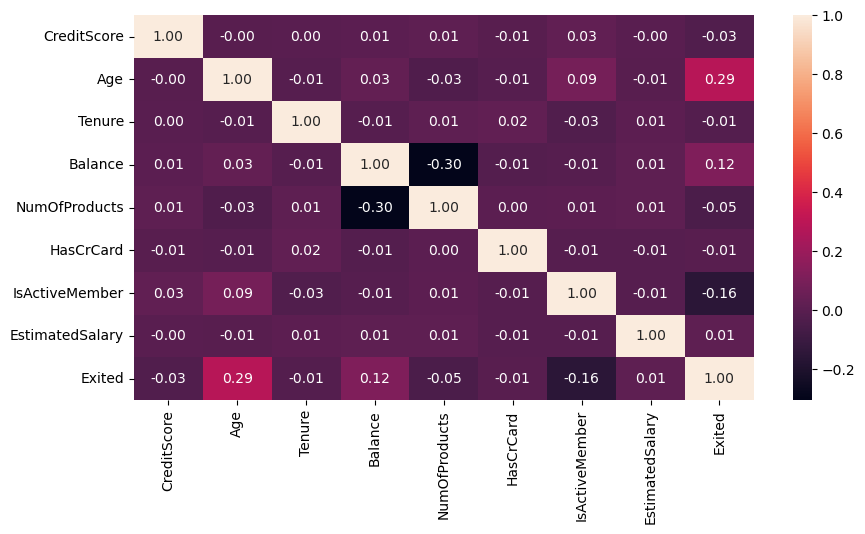

In [11]:
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, fmt=".2f")

<AxesSubplot: xlabel='Age', ylabel='CreditScore'>

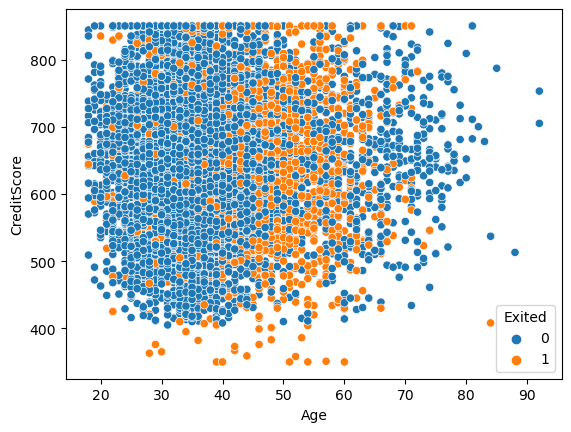

In [12]:
sns.scatterplot(data=df, x='Age', y='CreditScore', hue='Exited')

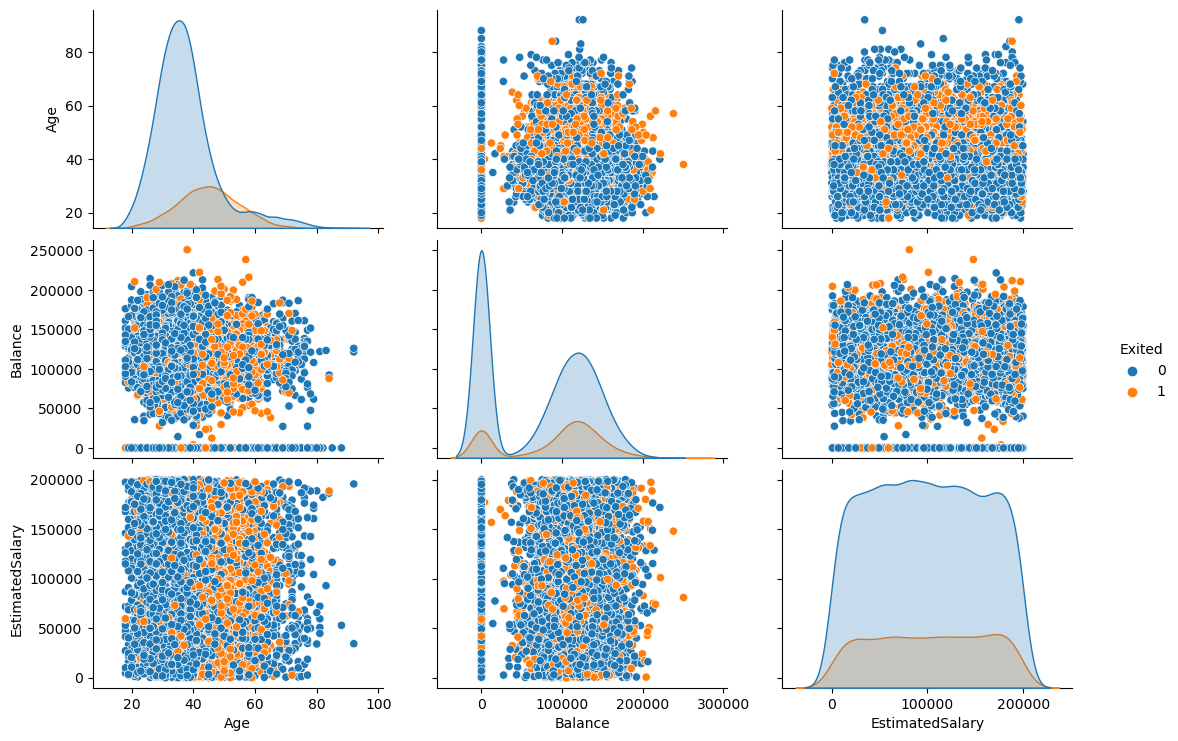

In [13]:
# plt.figure(figsize=(20, 15))
sns.pairplot(data=df, vars=['Age', 'Balance','EstimatedSalary'], hue='Exited', aspect=1.5)

(array([  19.,  166.,  447.,  958., 1444., 1866., 1952., 1525.,  968.,
         655.]),
 array([350., 400., 450., 500., 550., 600., 650., 700., 750., 800., 850.]),
 <BarContainer object of 10 artists>)

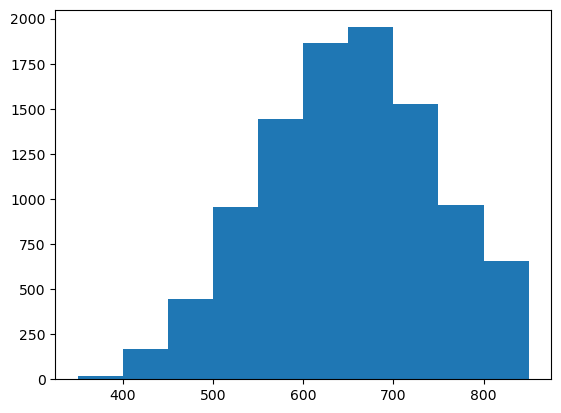

In [14]:
plt.hist(x=df['CreditScore'])

In [15]:
df.Age.value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

<AxesSubplot: xlabel='age_bin'>

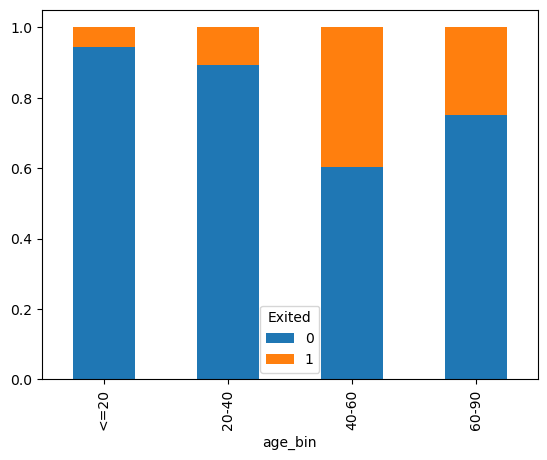

In [16]:
bins=[0,20,40,60,90]
label=['<=20', '20-40','40-60','60-90']
df['age_bin']=pd.cut(df.Age, bins=bins, labels=label)
age_bin = pd.crosstab(df.age_bin, df.Exited)
age_bin.div(age_bin.sum(1), axis=0).plot(kind='bar', stacked=True)


In [17]:
df.drop(columns=['age_bin'], inplace=True)

C:\Users\DarkLord\AppData\Local\Temp\ipykernel_2108\2271520434.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Age'])


<AxesSubplot: ylabel='Density'>

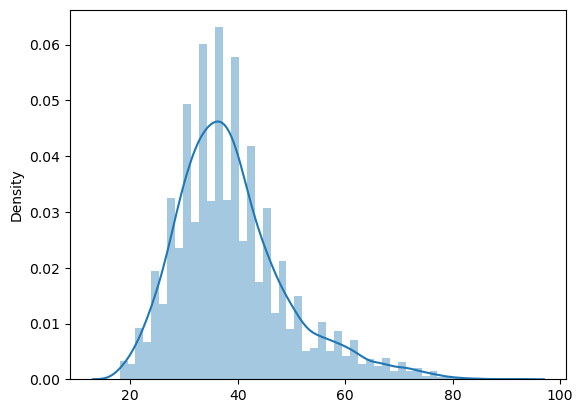

In [18]:
sns.distplot(x=df['Age'])

<AxesSubplot: xlabel='Geography'>

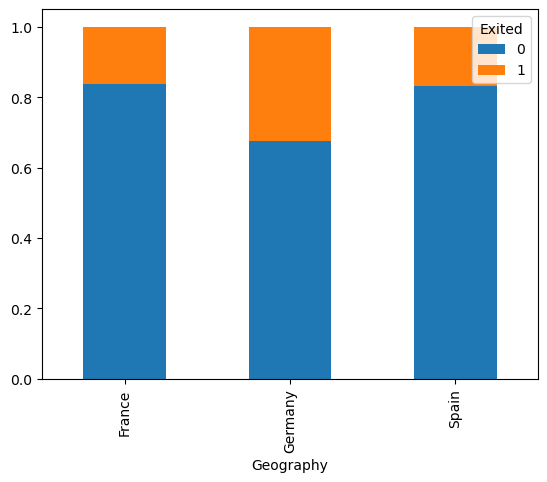

In [19]:
temp= pd.crosstab(df['Geography'], df['Exited'])
temp.div(temp.sum(1), axis=0).plot(kind='bar', stacked=True)
# sns.barplot()


C:\Users\DarkLord\AppData\Local\Temp\ipykernel_2108\4142648810.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Balance'])


<AxesSubplot: xlabel='Balance', ylabel='Density'>

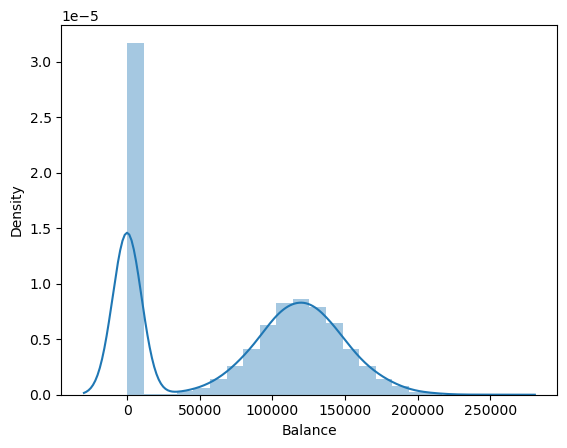

In [20]:
sns.distplot(df['Balance'])

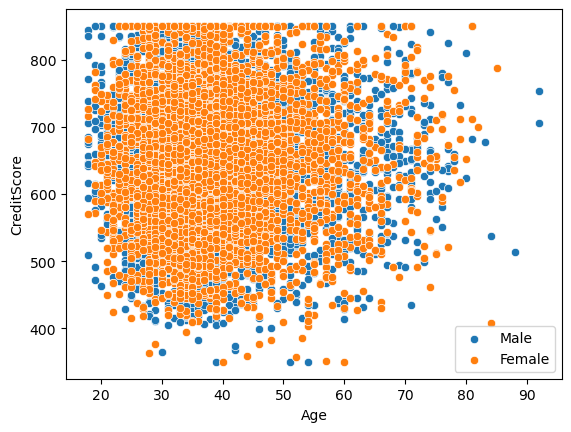

In [21]:
gender = ["Male", "Female"]
for i in gender:
    sns.scatterplot(x="Age",y="CreditScore",data=df[df["Gender"]==i],label=i)

<AxesSubplot: xlabel='Gender', ylabel='count'>

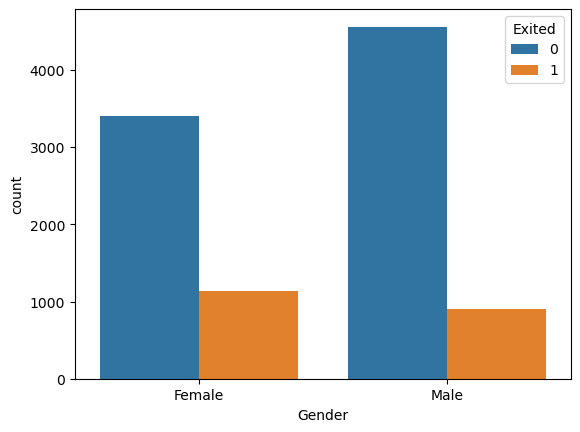

In [22]:
sns.countplot(data=df, x='Gender', hue='Exited')


# Feature Scaling

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
X=df.drop(columns=['Exited'])
y=df.Exited

gen = LabelEncoder()
X['Gender']=gen.fit_transform(X['Gender'])

ct=ColumnTransformer([('encode', OneHotEncoder(),[1])],remainder='passthrough')
X=ct.fit_transform(X)

sc=StandardScaler()
X=sc.fit_transform(X)


In [25]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# Model Building

In [26]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

def get_accuracy(y_pred, model):
    print("Precision score: ", precision_score(y_test, y_pred))
    print("Recall score: ", recall_score(y_test, y_pred))
    print("Accuracy score: ", accuracy_score(y_test, y_pred))
    print("F1 score: ", f1_score(y_test, y_pred))

## Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

In [28]:
print("#### Logistic Regression ####")
get_accuracy(y_pred, lr)

#### Logistic Regression ####
Precision score:  0.5818181818181818
Recall score:  0.23703703703703705
Accuracy score:  0.811
F1 score:  0.3368421052631579


## SVM

In [29]:
from sklearn.svm import SVC

svc=SVC(kernel='rbf')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [30]:
print("#### SVM ####")
get_accuracy(y_pred, svc)

#### SVM ####
Precision score:  0.8035714285714286
Recall score:  0.4444444444444444
Accuracy score:  0.8655
F1 score:  0.5723370429252782


## Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

tree= DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)
y_pred=tree.predict(X_test)

In [32]:
print("#### Decision Tree ####")
get_accuracy(y_pred, tree)


#### Decision Tree ####
Precision score:  0.8515625
Recall score:  0.2691358024691358
Accuracy score:  0.8425
F1 score:  0.4090056285178236


## Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

randfor = RandomForestClassifier(n_estimators=200, max_depth=4)
randfor.fit(X_train, y_train)
y_pred =randfor.predict(X_test)

In [34]:
print("#### Random Forest ####")
get_accuracy(y_pred, randfor)


#### Random Forest ####
Precision score:  0.8983050847457628
Recall score:  0.2617283950617284
Accuracy score:  0.8445
F1 score:  0.40535372848948376


# Hyperparameter Tuning

In [38]:
from sklearn.model_selection import GridSearchCV
svc= SVC()
param={"C":[1,2,4,6,10], "kernel": ['rbf', 'poly'], 'gamma': ['auto', 'scale']}
gs= GridSearchCV(svc, param_grid=param, cv=10, n_jobs=-1).fit(X_train, y_train)
gs.best_params_

{'C': 4, 'gamma': 'auto', 'kernel': 'rbf'}

In [39]:
svc=SVC(C=4,gamma='auto', kernel='rbf')
svc.fit(X_train, y_train)
y_pred= svc.predict(X_test)
get_accuracy(y_pred, svc)

Precision score:  0.7471698113207547
Recall score:  0.4888888888888889
Accuracy score:  0.863
F1 score:  0.591044776119403


In [40]:
# from sklearn.model_selection import GridSearchCV
randfor = RandomForestClassifier()
param ={'n_estimators': [100,150,200,250], "max_depth":[2,4,6,8]}
gs = GridSearchCV(randfor, param_grid=param, cv=10,
                  n_jobs=-1).fit(X_train, y_train)
gs.best_params_


{'max_depth': 8, 'n_estimators': 150}

In [42]:
randfor = RandomForestClassifier(max_depth=8,n_estimators=150).fit(X_train,y_train)
y_pred = randfor.predict(X_test)

get_accuracy(y_pred, randfor)

Precision score:  0.7926829268292683
Recall score:  0.48148148148148145
Accuracy score:  0.8695
F1 score:  0.599078341013825
